<a href="https://colab.research.google.com/github/kzielins/ML_courses/blob/main/07_TF_Keras_Digits_wihtout_PHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# digits
based on :
https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd

* video : https://www.youtube.com/watch?v=u4alGiomYP4


* TF 2: https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd/blob/master/tensorflow-mnist-tutorial/keras_01_mnist.ipynb

* TF 1 (old)
https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd/blob/master/tensorflow-mnist-tutorial/mnist_1.0_softmax.py

* code for all series : https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd/



In [ ]:
BATCH_SIZE = 128
EPOCHS = 10

import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
plt.ioff()
plt.rc('image', cmap='gray_r')
plt.rc('grid', linewidth=1)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0', figsize=(16,9))

In [ ]:
(X_train_raw, y_train), (X_test_raw, y_test) = keras.datasets.mnist.load_data()

In [ ]:
train_size=len(X_train)

In [ ]:
X_train_raw[0].shape

(28, 28)

In [ ]:
X_train_raw[0]

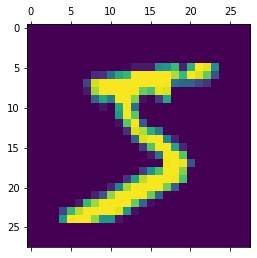

In [ ]:
plt.matshow(X_train_raw[0])

In [ ]:
X_train_norm=X_train_raw/256
X_test_norm=X_test_raw/256

In [ ]:
X_train_norm[0]

In [ ]:
plt.matshow(X_train_norm[0])

In [ ]:
X_train_flattened = X_train_norm.reshape(len(X_train),28*28)
X_test_flattened = X_test_norm.reshape(len(X_test),28*28)

In [171]:
import IPython.display as display
# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  digits=digits[:n]
  labels=labels[:n]
  predictions=predictions[:n]
  
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  
  fig = plt.figure(figsize=(16,9))
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  plt.grid(b=None)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)
  #display.display(fig)

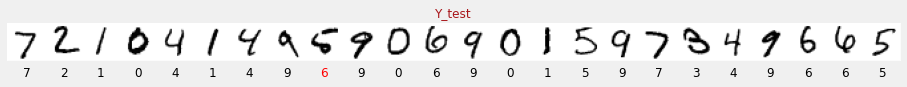

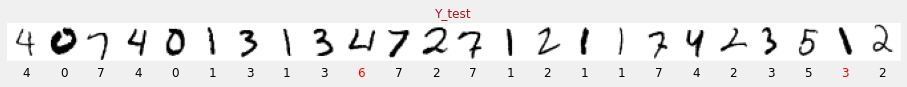

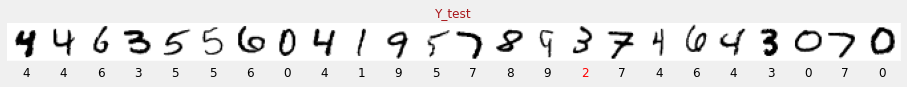

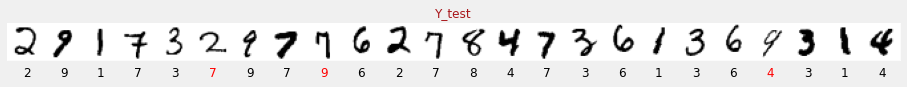

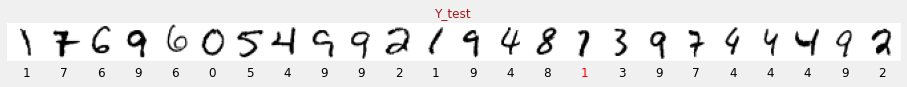

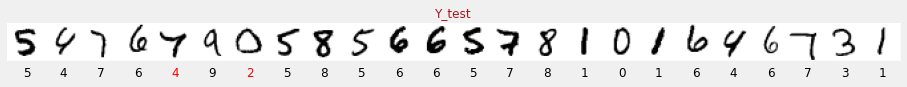

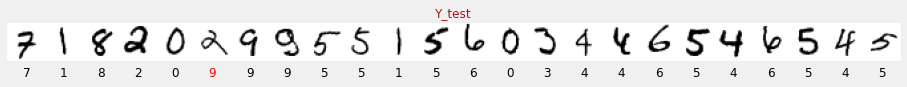

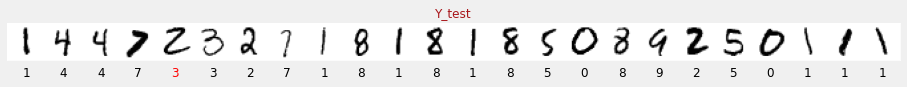

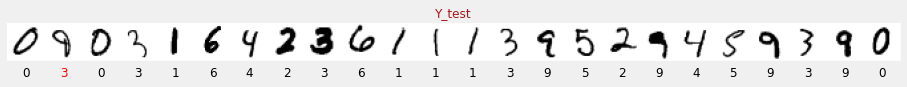

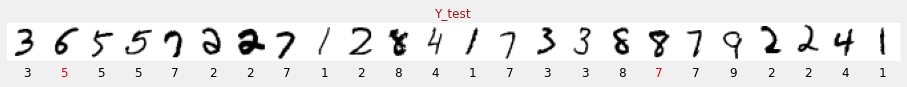

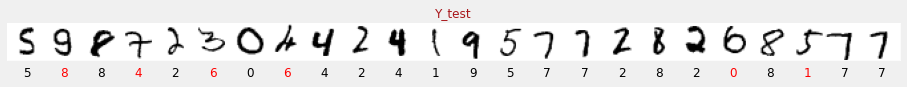

In [179]:
for i in range(11):
  display_digits(X_test_flattened[i*NN:],y_predicted_labels[i*NN:],y_test[i*NN:],'Y_test',NN)


In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    keras.layers.Dense(10,activation='softmax') 
      ])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
              )
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
STEPS_per_epoch=train_size/BATCH_SIZE
model.fit(X_train_flattened,y_train,
          steps_per_epoch=STEPS_per_epoch,
          epochs=EPOCHS,
          verbose=1)

Epoch 1/10
468/468 [==============================] - 2s 2ms/step - loss: 1.6474 - accuracy: 0.5465
Epoch 2/10
468/468 [==============================] - 1s 2ms/step - loss: 0.7632 - accuracy: 0.8341
Epoch 3/10
468/468 [==============================] - 1s 2ms/step - loss: 0.6091 - accuracy: 0.8558
Epoch 4/10
468/468 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.8690
Epoch 5/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4940 - accuracy: 0.8747
Epoch 6/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.8780
Epoch 7/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8816
Epoch 8/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8850
Epoch 9/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8879
Epoch 10/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.8903

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3809 - accuracy: 0.8994


[0.3809492588043213, 0.899399995803833]

In [ ]:
y_predicted=model.predict(X_test_flattened,steps=1)
y_predicted_labels=np.argmax(y_predicted,axis=1)
y_predicted_labels

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
X_test_flattened.shape

(10000, 784)

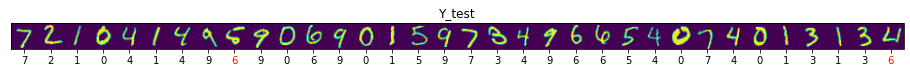

In [166]:
display_digits(X_test_flattened,y_predicted_labels,y_test,'Y_test',34)

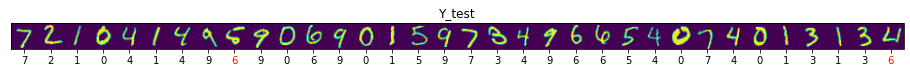

In [167]:
display_digits(X_test_flattened,y_predicted_labels,y_test,'Y_test',34)

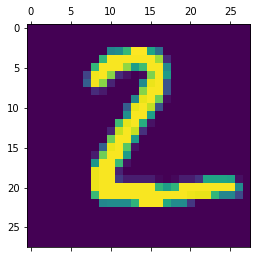

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,   12,  910,   17,    6,    5,   13,   10,   47,    4],
       [   4,    0,   17,  917,    0,   27,    2,   11,   24,    8],
       [   1,    1,    3,    2,  904,    0,   12,    4,   10,   45],
       [   9,    2,    1,   28,    7,  786,   15,    4,   33,    7],
       [  11,    3,    4,    1,    7,   13,  913,    2,    4,    0],
       [   1,    5,   20,    8,    7,    0,    0,  943,    4,   40],
       [   6,    6,    6,   18,    9,   27,    8,    9,  878,    7],
       [  10,    7,    1,    9,   24,    6,    0,   16,    9,  927]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

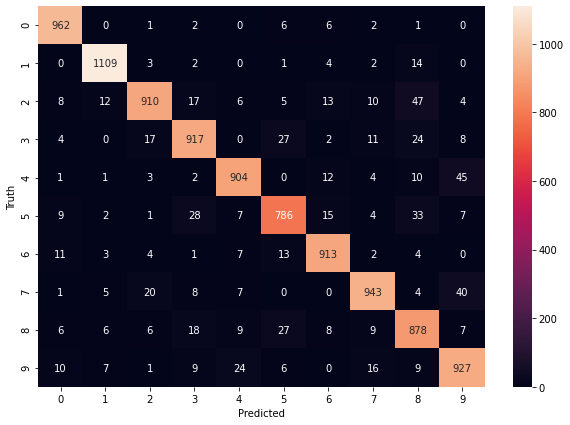

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
#              loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train_flattened,y_train,epochs=5
          #,batch_size=3000
          )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4445 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1341 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0902 - accuracy: 0.9731
Epoch 4/5
 715/1875 [==========>...................] - ETA: 2s - loss: 0.0634 - accuracy: 0.9819

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9765


[0.0799296423792839, 0.9764999747276306]

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
#              loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train,y_train,epochs=5
          #,batch_size=3000
          )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.8718
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9849


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8983


[0.39938855171203613, 0.8982999920845032]

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') 
      ])
model.compile(
    optimizer='Adam',
 #   optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
 #             loss='mean_squared_error',
              metrics=['accuracy'] 
              )
model.fit(X_train,y_train,epochs=5
          #,batch_size=3000
          )
model.evaluate(X_test,y_test)